In [79]:
# some labraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [80]:
# dataset
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [81]:
# shape of the data
data.shape

(3276, 10)

In [82]:
# Missing value in percentage
data.isnull().sum()/len(data)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

Large number of missing value in the data , so we can not just drop them all , it  might be not good for the model , replacing with the mean value

In [83]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [84]:
# Fill missing values with the mean value of the predictor

from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy= 'mean')
r= imp.fit_transform(data[['ph']])
s= imp.fit_transform(data[['Sulfate']])
t= imp.fit_transform(data[['Trihalomethanes']])
data['ph']=r
data['Sulfate']= s
data['Trihalomethanes']=t

In [85]:
data.isnull().sum()/len(data) # filled nan

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

### The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption.

#### Target - Potability

In [86]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

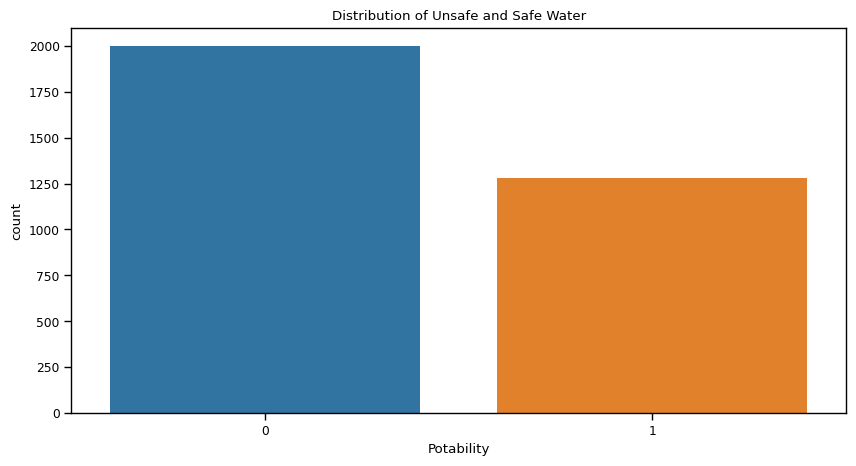

In [87]:
plt.figure(figsize=(10, 5))
sns.countplot(data = data , x = 'Potability')
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

Note that this dataset is not balanced because samples of 0s are more than 1s.

## EDA of predictors
### 1 ph


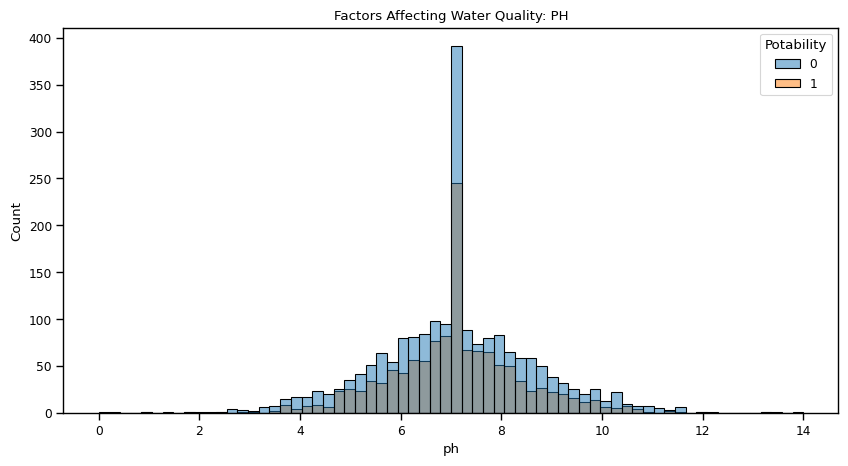

In [88]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'ph' , hue='Potability' )
plt.title("Factors Affecting Water Quality: PH")
plt.show()

The ph column represents the water's ph value, which is an important factor in determining the acid-base balance. Drinking water should have a pH between 6.5 and 8.5. Now consider the second factor influencing water quality in the dataset:

### 2 Hardness

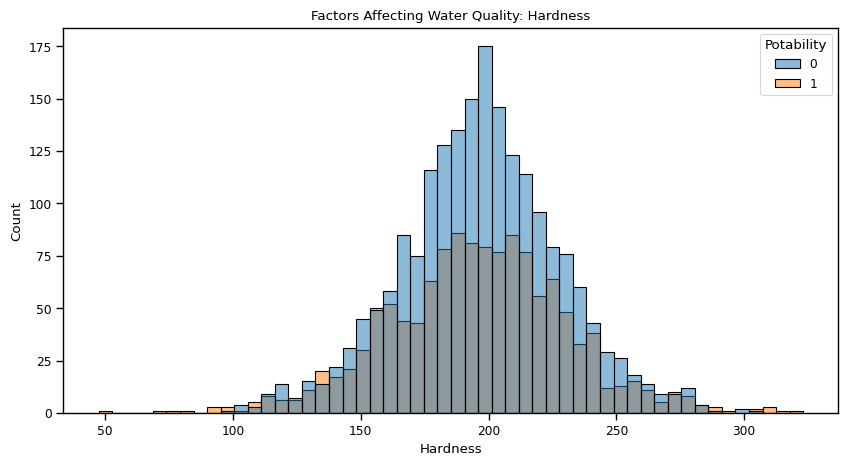

In [89]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Hardness' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Hardness')
plt.show()

The distribution of water hardness in the dataset is depicted in the figure above. Water hardness varies according to its source, but water with a hardness of 120-200 milligrammes is drinkable. Let us now look at the next factor influencing water quality:

### 3 Solids

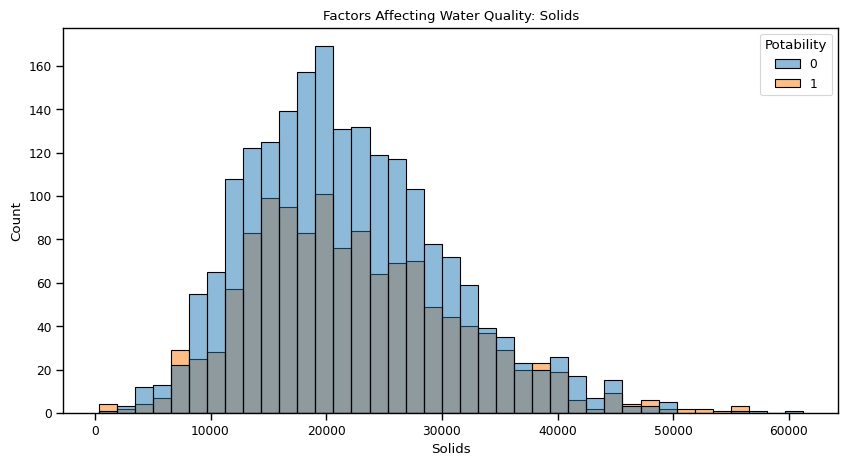

In [90]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Solids' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Solids')
plt.show()

All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now let’s take a look at the next factor affecting water quality:

### 4 Chloramines

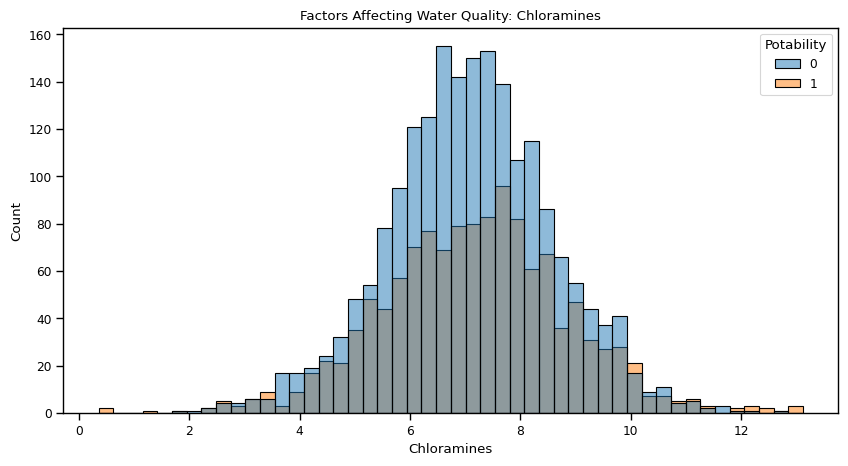

In [91]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Chloramines' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Chloramines')
plt.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems.

### 5 Sulfate

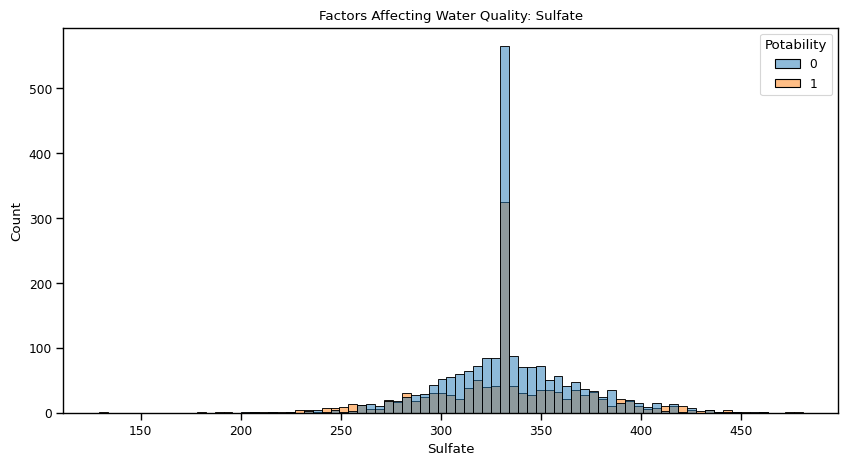

In [92]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Sulfate' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Sulfate')
plt.show()

 Distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

### 6 Conductivity

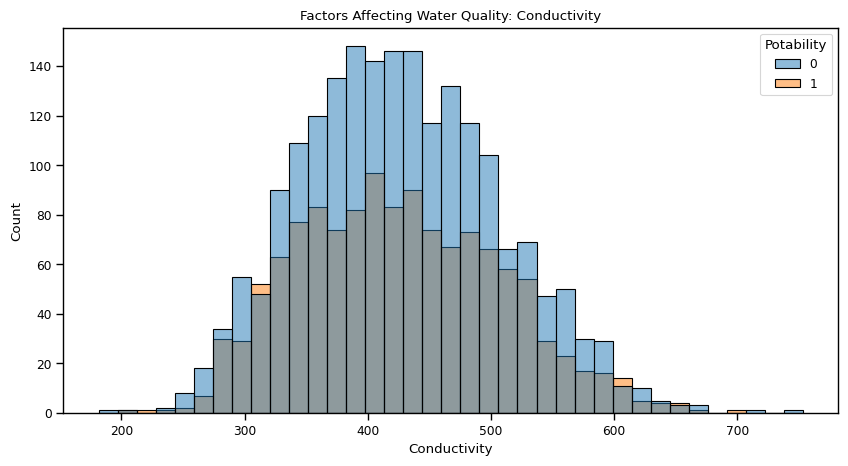

In [93]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Conductivity' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Conductivity')
plt.show()

Represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable.

### 7 Organic_carbon

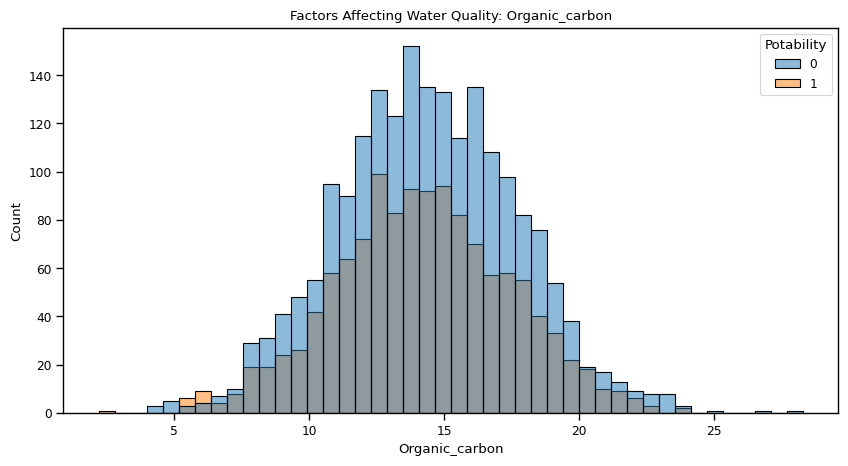

In [94]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Organic_carbon' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Organic_carbon')
plt.show()

Distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink. 

### 8 Trihalomethanes

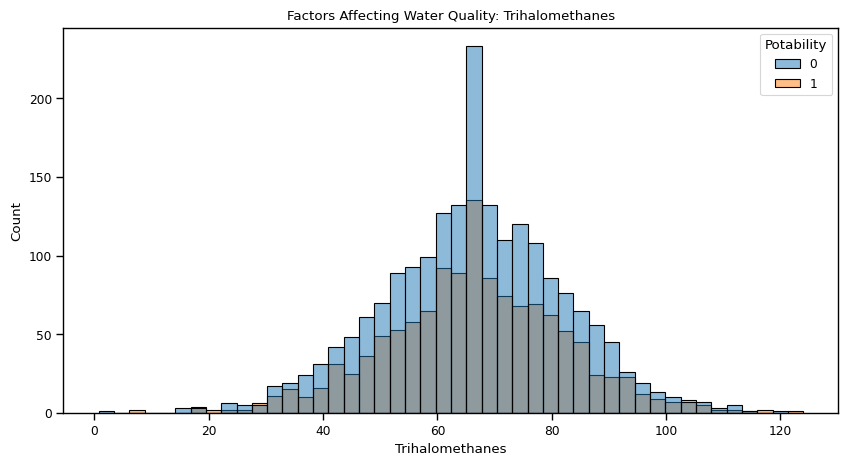

In [95]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Trihalomethanes' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Trihalomethanes')
plt.show()

The distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. 

### 9 Turbidity

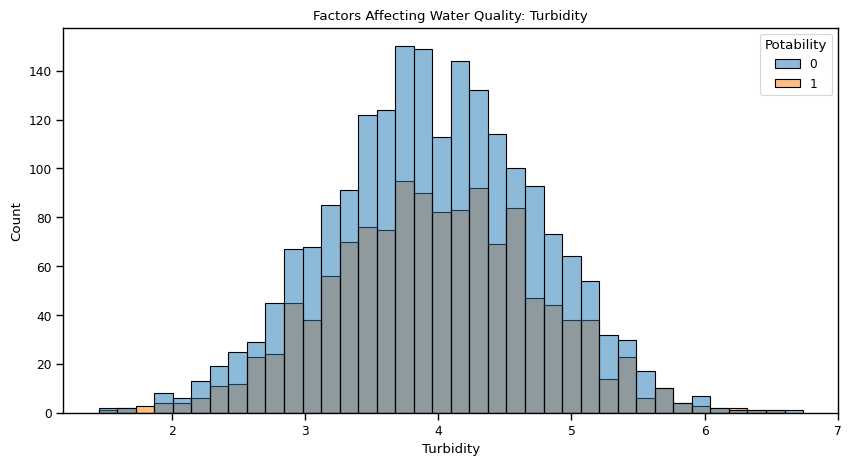

In [96]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data , x = 'Turbidity' , hue='Potability' )
plt.title('Factors Affecting Water Quality: Turbidity')
plt.show()

### Before training a machine learning model, let’s have a look at the correlation of all the features with respect to the Potability column in the dataset:

In [97]:
# Correlation b/w all the predictors
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.075833
Organic_carbon     0.040061
Conductivity       0.017192
Sulfate            0.014403
Trihalomethanes    0.002994
Potability        -0.003287
Chloramines       -0.031811
Turbidity         -0.036222
Solids            -0.081884
Name: ph, dtype: float64

<AxesSubplot: >

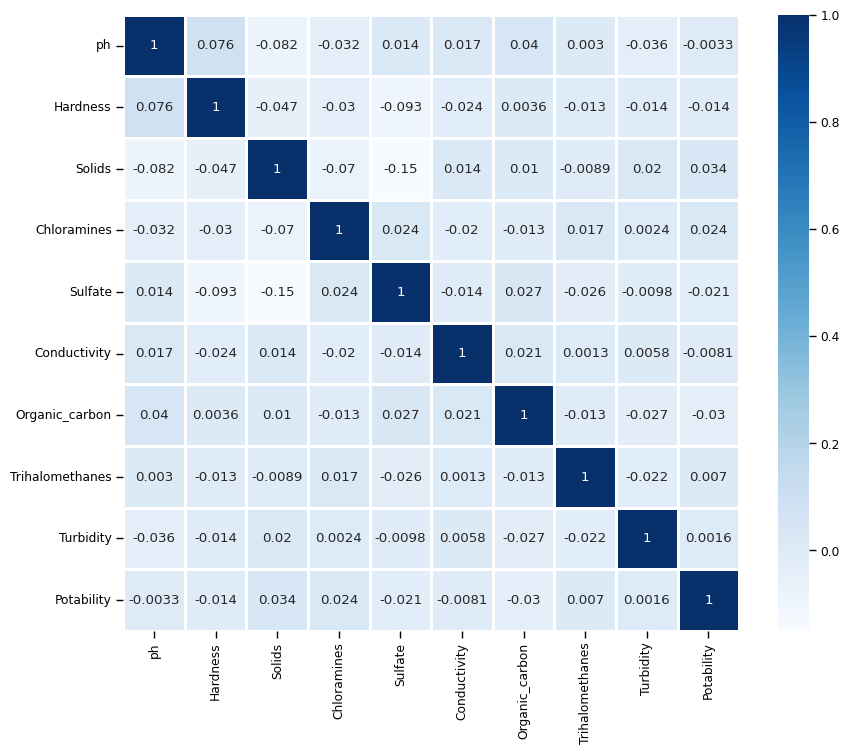

In [98]:
# Visualization of correlation matrics
plt.figure(figsize=(10,8))
sns.set_context('paper')
sns.heatmap(data.corr(),cmap='Blues',linecolor='White',linewidth='1',annot=True,square=True)

Data is not correlated with each other as we can see in correlation matrix

## Normalizing

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [100]:
#splitting before normalizing
X = data.iloc[:,:9].values
y = data.iloc[:,9:10].values

In [101]:
#!pip install imbalanced-learn

In [102]:
from sklearn.preprocessing import StandardScaler
#normalizing using Standard Scaler

sc = StandardScaler()
X = sc.fit_transform(X)

## Models

### with imbalance target variable

In [103]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.callbacks import ModelCheckpoint

In [104]:
model= keras.Sequential([
    Dense(128, input_shape= (9,), activation= 'relu'),
    Dropout(0.5),
    Dense(64, activation= 'relu'),
    Dropout(0.4),
    Dense(32, activation= 'relu'),
    Dropout(0.4),
    Dense(1, activation= 'sigmoid')
    
])


In [105]:
model.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
) 

In [106]:
history = model.fit(X , y ,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
22/22 [==============================] - 2s 16ms/step - loss: 0.7068 - accuracy: 0.5501 - val_loss: 0.6968 - val_accuracy: 0.5582
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.6108 - val_loss: 0.6913 - val_accuracy: 0.5582
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6658 - accuracy: 0.6299 - val_loss: 0.6880 - val_accuracy: 0.5582
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6592 - accuracy: 0.6372 - val_loss: 0.6863 - val_accuracy: 0.5591
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6630 - accuracy: 0.6258 - val_loss: 0.6843 - val_accuracy: 0.5591
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6573 - accuracy: 0.6399 - val_loss: 0.6825 - val_accuracy: 0.5610
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.6340 - val_loss: 0.6818 - val_accuracy: 0.5647
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.6983 - val_loss: 0.6526 - val_accuracy: 0.6349
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.7001 - val_loss: 0.6501 - val_accuracy: 0.6349
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.7024 - val_loss: 0.6486 - val_accuracy: 0.6349
Epoch 62/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5863 - accuracy: 0.6933 - val_loss: 0.6551 - val_accuracy: 0.6285
Epoch 63/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5836 - accuracy: 0.6996 - val_loss: 0.6520 - val_accuracy: 0.6285
Epoch 64/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.6992 - val_loss: 0.6557 - val_accuracy: 0.6248
Epoch 65/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.7106 - val_loss: 0.6495 - val_accuracy: 0.6423
Epoch 

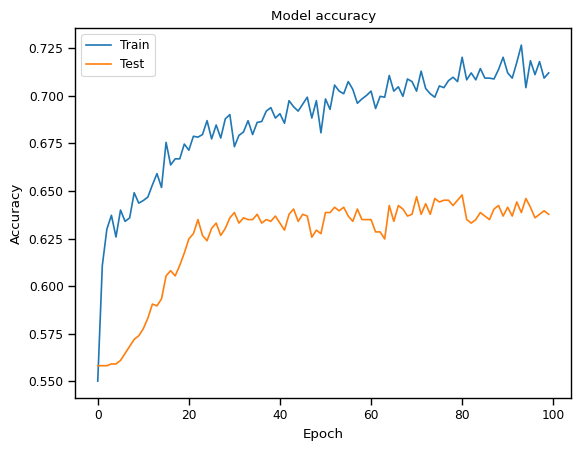

In [107]:
# Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

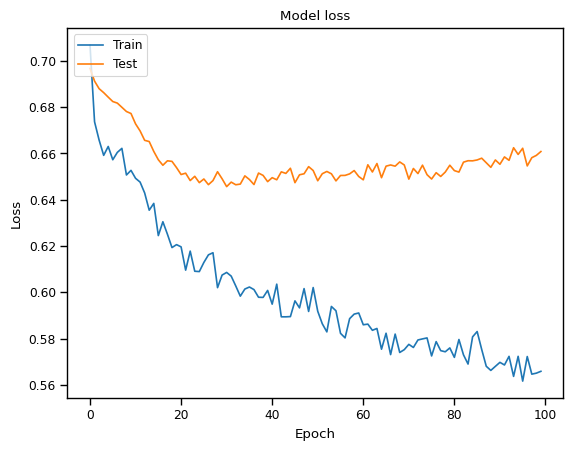

In [108]:
# Model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Resampling the dataset using oversampling technique

In [109]:
# target
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [110]:
NotPotable  = data[data['Potability']==0]   #zero values in Potability column
Potable = data[data['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
data_minority_upsampled = resample(Potable, replace = True, n_samples = 1998) 
#concatenate
data1 = pd.concat([NotPotable, data_minority_upsampled])

from sklearn.utils import shuffle
data1 = shuffle(data1) # shuffling so that there is particular sequence

In [111]:
# target
data1.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

### got balanced dataset

In [112]:
#splitting before normalizing
X = data1.iloc[:,:9].values
y = data1.iloc[:,9:10].values

In [113]:
from sklearn.preprocessing import StandardScaler
#normalizing using Standard Scaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [114]:
model= keras.Sequential([
    Dense(128, input_shape= (9,), activation= 'relu'),
    Dropout(0.5),
    Dense(64, activation= 'relu'),
    Dropout(0.4),
    Dense(32, activation= 'relu'),
    Dropout(0.4),
    Dense(1, activation= 'sigmoid')
    
])

In [115]:
model.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
) 

In [116]:
history = model.fit(X,y,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 0.7106 - accuracy: 0.4950 - val_loss: 0.6868 - val_accuracy: 0.5648
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.5334 - val_loss: 0.6839 - val_accuracy: 0.5770
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5301 - val_loss: 0.6814 - val_accuracy: 0.5739
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5383 - val_loss: 0.6793 - val_accuracy: 0.5792
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5517 - val_loss: 0.6758 - val_accuracy: 0.5754
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.5588 - val_loss: 0.6727 - val_accuracy: 0.5861
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.5626 - val_loss: 0.6690 - val_accuracy: 0.5906
Epoch 8/100


Epoch 59/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5990 - accuracy: 0.6702 - val_loss: 0.6135 - val_accuracy: 0.6596
Epoch 60/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.6731 - val_loss: 0.6136 - val_accuracy: 0.6596
Epoch 61/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.6735 - val_loss: 0.6149 - val_accuracy: 0.6573
Epoch 62/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6010 - accuracy: 0.6612 - val_loss: 0.6141 - val_accuracy: 0.6497
Epoch 63/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5971 - accuracy: 0.6731 - val_loss: 0.6135 - val_accuracy: 0.6581
Epoch 64/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5928 - accuracy: 0.6731 - val_loss: 0.6133 - val_accuracy: 0.6543
Epoch 65/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.6769 - val_loss: 0.6117 - val_accuracy: 0.6694
Epoch 

In [117]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               1280      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 1)               

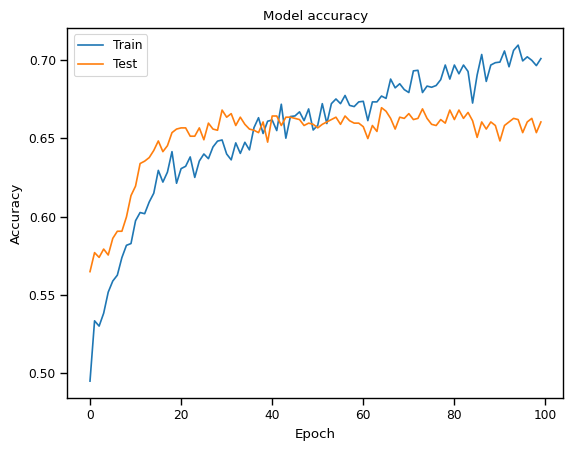

In [118]:
# Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

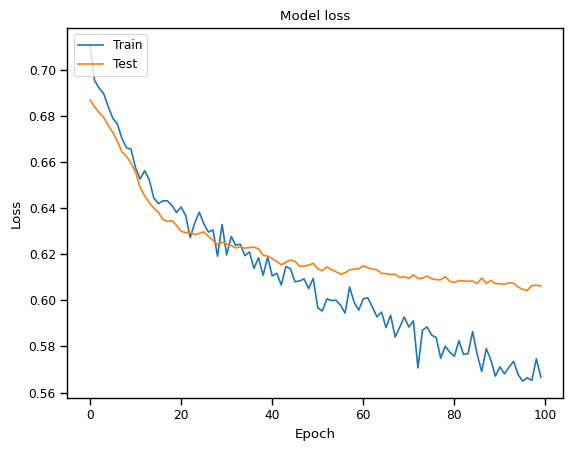

In [119]:
# Model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()